In [1]:
#导入常用包
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.metrics import explained_variance_score
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error # 平方绝对误差
import random


In [2]:
#引入数据
#时间
time=[]
#特征
feature=[]
#目标
target=[]
csv_file = csv.reader(open('C:/Users/15830/Desktop/hs_data/hs_tr.csv'))
for content in csv_file:
    content=list(map(float,content))
    
    if len(content)!=0:
        feature.append(content[0:5])
        target.append(content[5:6])

csv_file = csv.reader(open('C:/Users/15830/Desktop/hs_data/hs_time.csv'))
for content in csv_file:
    content=list(map(str,content))
    if len(content)!=0:
        time.append(content)
        
targets=[]
for i in target:
    targets.append(i[0])

print(len(targets))
feature.reverse()

print(feature)


480
[[12.19, -1.54, 7.85, 12.99, 8.0], [21.08, 6.91, 9.54, 13.42, 13.0], [17.78, 9.5, 8.85, 13.44, 15.0], [115.32, 13.0, 9.06, 7.61, 17.0], [41.91, 18.6, 9.43, 6.78, 16.0], [219.2, 17.78, 11.39, 2.06, 23.0], [60.71, 16.69, 11.93, 2.35, 24.0], [63.25, 14.27, 9.72, 11.02, 15.0], [29.21, 7.27, 9.26, 15.63, 9.0], [42.93, 4.82, 9.12, 8.96, 19.0], [29.21, 1.83, 10.36, 10.99, 14.0], [37.59, 0.27, 9.48, 6.41, 19.0], [20.07, 1.36, 9.94, 13.1, 15.0], [13.97, 5.86, 10.41, 14.65, 14.0], [7.11, 11.27, 7.96, 11.91, 11.0], [69.6, 14.79, 8.98, 11.81, 9.0], [144.78, 18.41, 9.08, 9.77, 16.0], [125.22, 17.94, 8.45, 7.02, 21.0], [69.6, 15.96, 9.79, 9.69, 20.0], [188.98, 12.52, 9.11, 11.94, 13.0], [49.53, 10.47, 9.36, 8.88, 18.0], [40.39, 3.83, 11.07, 9.61, 24.0], [26.92, 1.43, 9.98, 3.56, 25.0], [26.92, 0.43, 9.63, 9.72, 22.0], [30.99, 0.41, 10.02, 7.92, 25.0], [35.81, 7.44, 7.78, 12.67, 15.0], [15.24, 7.84, 9.79, 12.33, 14.0], [33.27, 14.7, 9.72, 9.27, 17.0], [140.72, 18.33, 9.9, 5.23, 24.0], [63.5, 19.0

<Figure size 432x288 with 0 Axes>

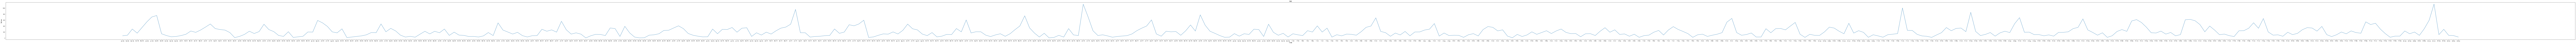

In [3]:
#str转datetime调整时间日期的格式
time_rel=[]
for i,j in enumerate(time):
    time_rel.append(j[0])


fig = plt.gcf()
plt.figure(figsize=(400, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.title('TURE')
plt.plot(time_rel, targets)
plt.xlabel('Time',fontsize=14,verticalalignment='top')
plt.ylabel('Value',fontsize=14,horizontalalignment='center')
plt.show()




In [4]:
# 标准化转换

scaler = StandardScaler()
# 训练标准化对象
scaler.fit(feature)
# 转换数据集
feature= scaler.transform(feature)


[[-0.74940856 -1.73371519  0.31793543  0.62004749  0.43170371]
 [ 0.29108517  0.66859492 -0.56271857 -0.96370757  0.23603064]
 [-0.55236188 -0.18011689 -0.78883243  0.32619934 -1.32935392]
 [-1.00801718 -1.55144152  0.57380112 -0.11241222  0.82304985]
 [ 0.24188409 -0.61728892  0.16917631 -0.23772981  0.82304985]
 [ 1.07902953  1.50021858  0.5440493  -1.03500896 -0.54666164]
 [-0.8109705  -2.15379906 -1.05064849  0.90525303 -0.1553155 ]
 [-0.58314285  0.22003079 -0.73527915  0.33700259 -1.32935392]
 [-0.96487535 -1.43467244 -1.62783388 -0.24421175 -1.52502699]
 [-0.60786457 -1.32787146  0.865369    0.52713962 -0.35098857]
 [-0.14615002  1.31509687 -2.02650833  0.72159795 -0.1553155 ]
 [-1.10641934 -1.07866916  0.99627703  1.13644238 -2.89473848]]
[[-0.60786457 -1.51868921  1.49610768  2.32479883 -2.50339234]
 [-0.74940856 -0.31539814 -0.54486747  1.60098172 -1.91637313]
 [-0.74940856  0.16022224 -0.81263389  0.33268129 -1.13368085]
 [-0.21983046  0.58885019 -0.7947828   0.4363924  -0.3

C:\Users\15830\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


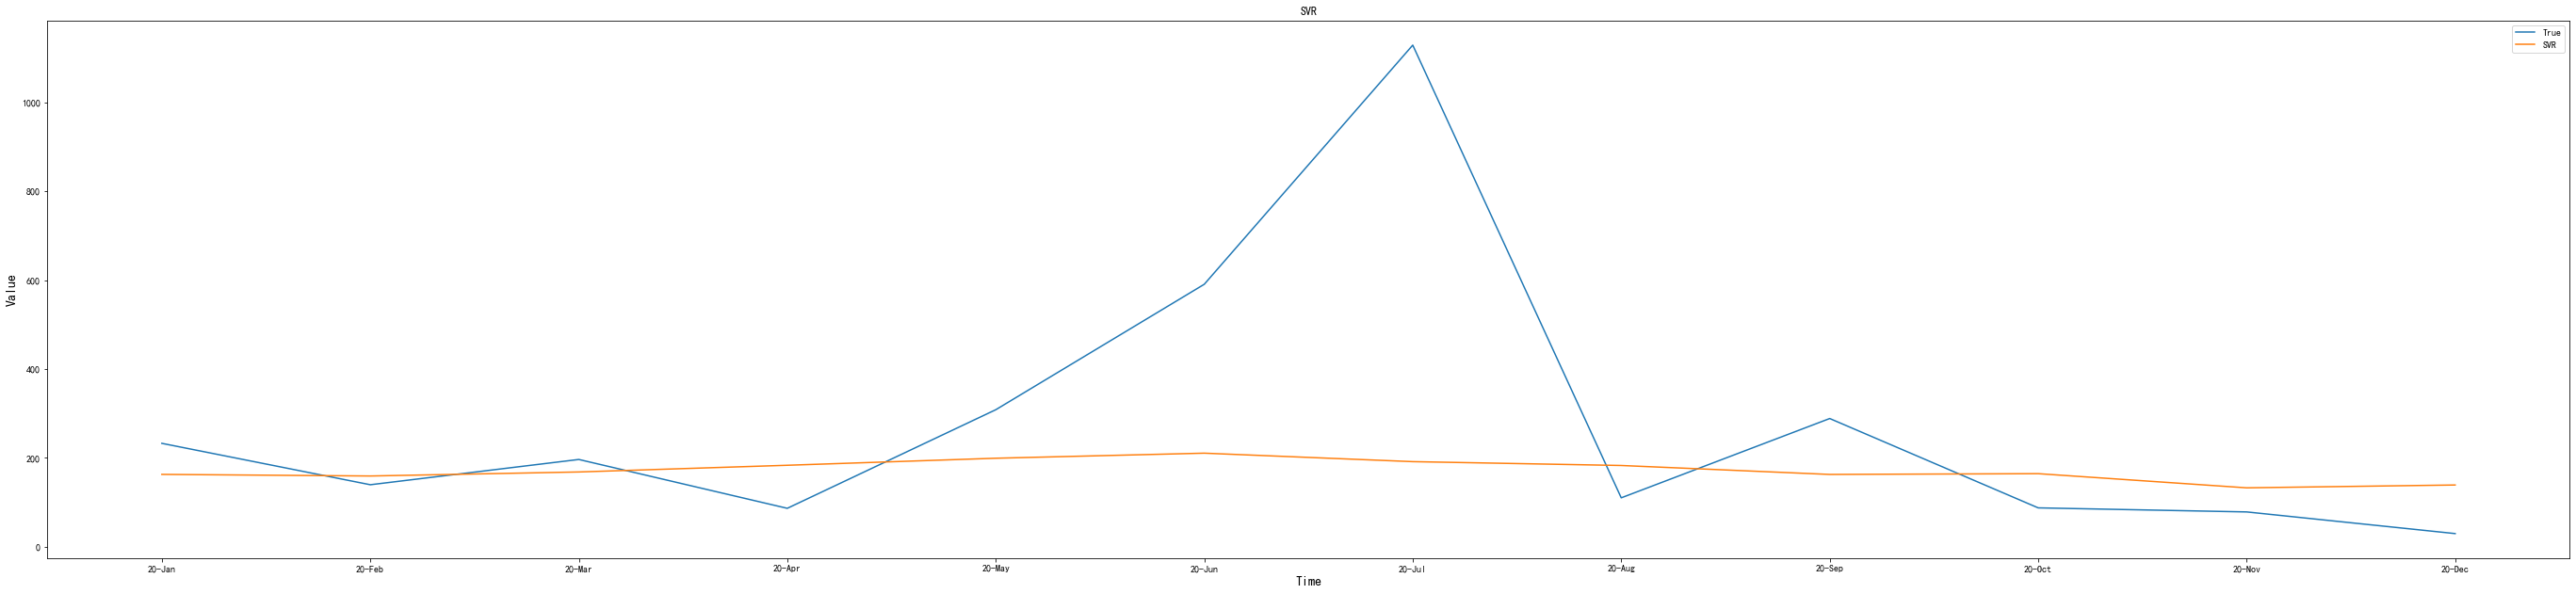

MSE: 91125.77620549935
R2 =  -0.0373263953159213
MAE =  173.44739717160732


In [5]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, targets, test_size=0.025,random_state=8)
print(feature_test)
feature_test=feature[int(len(feature)*0.975):int(len(feature))]
print(feature_test)
target_test=targets[int(len(targets)*0.975):int(len(targets))]
label_time=time_rel[int(len(time_rel)*0.975):int(len(time_rel))]

model_svr = SVR()
model_svr.fit(feature_train,target_train)
predict_results=model_svr.predict(feature_test)
plt.plot(label_time,target_test)#测试数组
plt.plot(label_time,predict_results)#测试数组
plt.legend(['True','SVR'])
fig = plt.gcf()
fig.set_size_inches(48, 10.5)
plt.title("SVR")  # 标题
plt.xlabel('Time',fontsize=14,verticalalignment='top')
plt.ylabel('Value',fontsize=14,horizontalalignment='center')
plt.show()
print("MSE:",mean_squared_error(target_test,predict_results))
print("R2 = ",metrics.r2_score(target_test,predict_results)) # R2
print("MAE = ",mean_absolute_error(target_test,predict_results)) # R2


In [6]:
class PSO:
    def __init__(self, parameters):
        """
        particle swarm optimization
        parameter: a list type, like [NGEN, pop_size, var_num_min, var_num_max]
        """
        # 初始化
        self.NGEN = parameters[0]    # 迭代的代数
        self.pop_size = parameters[1]    # 种群大小
        self.var_num = len(parameters[2])     # 变量个数
        self.bound = []                 # 变量的约束范围
        self.bound.append(parameters[2])
        self.bound.append(parameters[3])
 
        self.pop_x = np.zeros((self.pop_size, self.var_num))    # 所有粒子的位置
        self.pop_v = np.zeros((self.pop_size, self.var_num))    # 所有粒子的速度
        self.p_best = np.zeros((self.pop_size, self.var_num))   # 每个粒子最优的位置
        self.g_best = np.zeros((1, self.var_num))   # 全局最优的位置
 
        # 初始化第0代初始全局最优解
        temp = -1
        for i in range(self.pop_size):
            for j in range(self.var_num):
                self.pop_x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.pop_v[i][j] = random.uniform(0, 1)
            self.p_best[i] = self.pop_x[i]      # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            if fit > temp:
                self.g_best = self.p_best[i]
                temp = fit
 
    def fitness(self, ind_var):
        X = feature_train
        y = target_train
        """
        个体适应值计算
        """
        x1 = ind_var[0]
        x2 = ind_var[1]
        x3 = ind_var[2]
        
        if x1==0:x1=0.001
        if x2==0:x2=0.001
        if x3==0:x3=0.001
            
        clf = SVR(C=x1,epsilon=x2,gamma=x3)
        clf.fit(X, y)
        predictval=clf.predict(feature_test)
        print("R2 = ",metrics.r2_score(target_test,predictval)) # R2
        return  metrics.r2_score(target_test,predictval)
 
    def update_operator(self, pop_size):
        """
        更新算子：更新下一时刻的位置和速度
        """
        c1 = 2     # 学习因子，一般为2
        c2 = 2
        w = 0.4    # 自身权重因子
        for i in range(pop_size):
            # 更新速度
            self.pop_v[i] = w * self.pop_v[i] + c1 * random.uniform(0, 1) * (
                        self.p_best[i] - self.pop_x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.pop_x[i])
            # 更新位置
            self.pop_x[i] = self.pop_x[i] + self.pop_v[i]
            # 越界保护
            for j in range(self.var_num):
                if self.pop_x[i][j] < self.bound[0][j]:
                    self.pop_x[i][j] = self.bound[0][j]
                if self.pop_x[i][j] > self.bound[1][j]:
                    self.pop_x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.pop_x[i]) > self.fitness(self.p_best[i]):
                self.p_best[i] = self.pop_x[i]
            if self.fitness(self.pop_x[i]) > self.fitness(self.g_best):
                self.g_best = self.pop_x[i]
 
    def main(self):
        popobj = []
        self.ng_best = np.zeros((1, self.var_num))[0]
        for gen in range(self.NGEN):
            self.update_operator(self.pop_size)
            popobj.append(self.fitness(self.g_best))
            print('############ Generation {} ############'.format(str(gen + 1)))
            if self.fitness(self.g_best) > self.fitness(self.ng_best):
                self.ng_best = self.g_best.copy()
            print('最好的位置：{}'.format(self.ng_best))
            print('最大的函数值：{}'.format(self.fitness(self.ng_best)))
        print("---- End of (successful) Searching ----")
 
        plt.figure()
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5)
        plt.title("Figure1")
        plt.xlabel("iterators", size=14)
        plt.ylabel("fitness", size=14)
        t = [t for t in range(self.NGEN)]
        plt.plot(t, popobj, color='b', linewidth=2)
        plt.show()


R2 =  -0.4971568738131136
R2 =  -0.4519622899035536
R2 =  -0.40842506347948637
R2 =  0.9096775800007944
R2 =  -0.1791477749669954
R2 =  0.6569009315163135
R2 =  0.9720826136995836
R2 =  -0.3326058988642333
R2 =  0.7931925263723429
R2 =  0.8133913653467983
R2 =  0.0464308371655795
R2 =  0.9834289846054338
R2 =  0.9403268485995664
R2 =  0.21667229008769473
R2 =  -0.14115825039119678
R2 =  -0.06921870764393812
R2 =  0.9647476092881229
R2 =  0.8379879616517161
R2 =  0.08151677719658523
R2 =  0.210460720880719
R2 =  -0.1131887352087324
R2 =  -0.4971568738131136
R2 =  -0.1131887352087324
R2 =  0.9834289846054338
R2 =  0.8891372343920989
R2 =  -0.4519622899035536
R2 =  0.8891372343920989
R2 =  0.9834289846054338
R2 =  0.9680986405864586
R2 =  -0.40842506347948637
R2 =  0.9680986405864586
R2 =  0.9834289846054338
R2 =  0.9653435532670831
R2 =  0.9096775800007944
R2 =  0.9653435532670831
R2 =  0.9834289846054338
R2 =  0.22336180761862512
R2 =  -0.1791477749669954
R2 =  0.22336180761862512
R2 = 

R2 =  0.9283722692171418
R2 =  0.9834782860879709
R2 =  0.9834804282350227
R2 =  0.9834641804437663
R2 =  0.983526651506261
R2 =  0.9834641804437663
R2 =  0.9834804282350227
R2 =  0.9474301349642559
R2 =  0.9403268485995664
R2 =  0.9474301349642559
R2 =  0.9834804282350227
R2 =  0.14531142122241436
R2 =  0.8871639035809479
R2 =  0.14531142122241436
R2 =  0.9834804282350227
R2 =  0.9834631397887381
R2 =  0.6636303590119523
R2 =  0.9834631397887381
R2 =  0.9834804282350227
R2 =  0.8704823336218275
R2 =  0.8594656532479095
R2 =  0.8704823336218275
R2 =  0.9834804282350227
R2 =  0.8460092543872211
R2 =  0.9806614783552743
R2 =  0.8460092543872211
R2 =  0.9834804282350227
R2 =  0.9834818929549276
R2 =  0.9830539815538925
R2 =  0.9834818929549276
R2 =  0.9834804282350227
R2 =  0.7809241612187675
R2 =  0.5618186882817093
R2 =  0.7809241612187675
R2 =  0.9834818929549276
R2 =  0.9834830790835705
R2 =  0.9834457012980988
R2 =  0.9834830790835705
R2 =  0.9834818929549276
R2 =  0.9834830790835705

R2 =  0.9834831968075718
R2 =  0.9834831945349125
R2 =  0.9834831968064206
R2 =  0.9834831945349125
R2 =  0.9834831968075718
R2 =  0.9834831968063585
R2 =  0.9834831968062274
R2 =  0.9834831968063585
R2 =  0.9834831968075718
R2 =  0.9834831968062274
R2 =  0.9851036262980062
R2 =  0.9834831968062274
R2 =  0.9834831968075718
R2 =  0.9834831968062274
R2 =  0.9834831968062274
R2 =  0.9834831968062274
R2 =  0.9834831968075718
R2 =  0.9834831968063587
R2 =  0.9834831968062274
R2 =  0.9834831968063587
R2 =  0.9834831968075718
R2 =  0.9834831968077651
R2 =  0.9834831968062274
R2 =  0.9834831968077651
R2 =  0.9834831968075718
R2 =  0.9834831968062274
R2 =  0.983526651506261
R2 =  0.9834831968062274
R2 =  0.9834831968077651
R2 =  0.9834831968057717
R2 =  0.9834831968064207
R2 =  0.9834831968057717
R2 =  0.9834831968077651
R2 =  0.9834831964718336
R2 =  0.9834831968064206
R2 =  0.9834831964718336
R2 =  0.9834831968077651
R2 =  0.9834831968064205
R2 =  0.9834831968062274
R2 =  0.9834831968064205
R

R2 =  0.9851036262980062
最大的函数值：0.9851036262980062
R2 =  0.9834831963968604
R2 =  0.9834831968064206
R2 =  0.9834831963968604
R2 =  0.9834831968075718
R2 =  0.2499335734227376
R2 =  0.9834831968065193
R2 =  0.2499335734227376
R2 =  0.9834831968075718
R2 =  0.9834831968064207
R2 =  0.9834831968064207
R2 =  0.9834831968064207
R2 =  0.9834831968075718
R2 =  0.2499335734227376
R2 =  0.9834831968064088
R2 =  0.2499335734227376
R2 =  0.9834831968075718
R2 =  0.9834831968075718
R2 =  0.9834831968075718
R2 =  0.9834831968075718
R2 =  0.9834831968075718
R2 =  0.9834831968064142
R2 =  0.9834831968064206
R2 =  0.9834831968064142
R2 =  0.9834831968075718
R2 =  0.9834831968064207
R2 =  0.9834831968075718
R2 =  0.9834831968064207
R2 =  0.9834831968075718
R2 =  0.9834831968062274
R2 =  0.9851036262980062
R2 =  0.9834831968062274
R2 =  0.9834831968075718
R2 =  0.9834831968062274
R2 =  0.9834831968062274
R2 =  0.9834831968062274
R2 =  0.9834831968075718
R2 =  0.9834831968058192
R2 =  0.9834831968064207

R2 =  0.9834831968077651
R2 =  0.9834831968075718
R2 =  0.9834831968075718
R2 =  0.9834831968075718
R2 =  0.9834831968077651
R2 =  0.9834831968064207
R2 =  0.9834831968064207
R2 =  0.9834831968064207
R2 =  0.9834831968077651
R2 =  0.9834831968064207
R2 =  0.9834831968064207
R2 =  0.9834831968064207
R2 =  0.9834831968077651
R2 =  0.9834831968062274
R2 =  0.9834831968075718
R2 =  0.9834831968062274
R2 =  0.9834831968077651
R2 =  0.9834831968077651
############ Generation 15 ############
R2 =  0.9834831968077651
R2 =  0.9851036262980062
最好的位置：[1768.85083119    0.           25.67520934]
R2 =  0.9851036262980062
最大的函数值：0.9851036262980062
R2 =  0.9834831968062274
R2 =  0.9834831968064207
R2 =  0.9834831968062274
R2 =  0.9834831968077651
R2 =  0.983483196806404
R2 =  0.9834831968065193
R2 =  0.983483196806404
R2 =  0.9834831968077651
R2 =  0.9834831968064207
R2 =  0.9834831968065193
R2 =  0.9834831968064207
R2 =  0.9834831968077651
R2 =  0.9834831968064174
R2 =  0.9834831968064088
R2 =  0.983

R2 =  0.983483196807765
R2 =  0.9834485332340183
R2 =  0.983526651506261
R2 =  0.9834485332340183
R2 =  0.983483196807765
R2 =  0.9834831968064057
R2 =  0.9834831968077651
R2 =  0.9834831968064057
R2 =  0.983483196807765
R2 =  0.9834831968064207
R2 =  0.9834831968075718
R2 =  0.9834831968064207
R2 =  0.983483196807765
R2 =  0.9834831968064185
R2 =  0.9834831968075718
R2 =  0.9834831968064185
R2 =  0.983483196807765
R2 =  0.2499335734227376
R2 =  0.9834831968077651
R2 =  0.2499335734227376
R2 =  0.983483196807765
R2 =  0.9834831968064196
R2 =  0.9834831968077651
R2 =  0.9834831968064196
R2 =  0.983483196807765
R2 =  0.9834831968064207
R2 =  0.9834831968075718
R2 =  0.9834831968064207
R2 =  0.983483196807765
R2 =  0.9834831968063588
R2 =  0.9834831968064207
R2 =  0.9834831968063588
R2 =  0.983483196807765
R2 =  0.9834831968064202
R2 =  0.9834831968075718
R2 =  0.9834831968064202
R2 =  0.983483196807765
R2 =  0.983483196807765
############ Generation 19 ############
R2 =  0.98348319680776

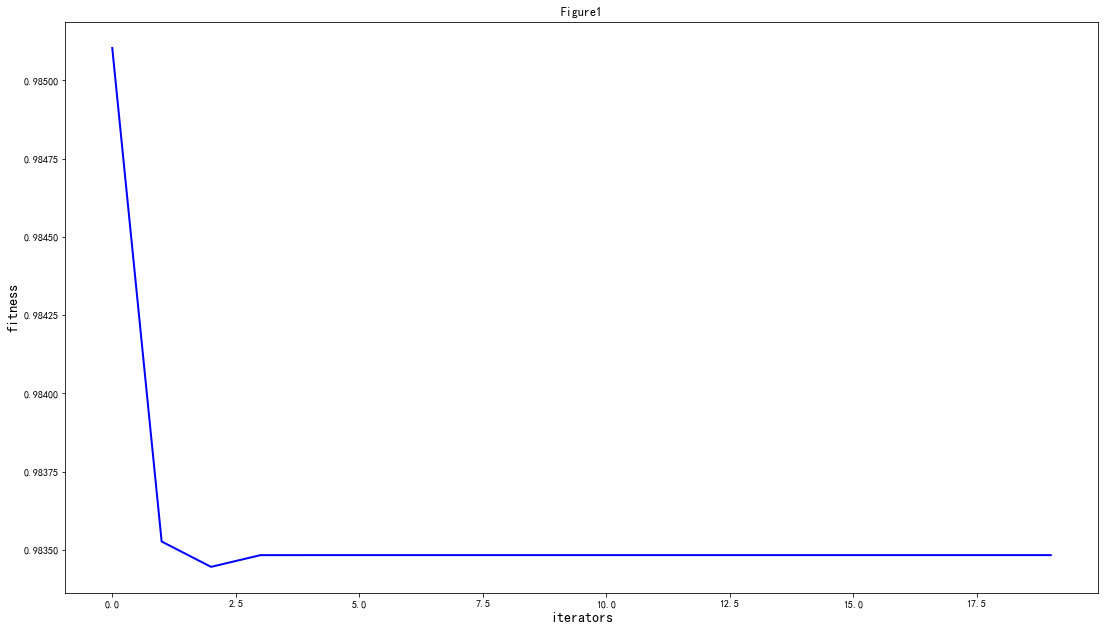

In [7]:
if __name__ == '__main__':
    NGEN = 20
    popsize = 20
    low = [0,0,0]
    up = [20000,500,10000]
    parameters = [NGEN, popsize, low, up]
    pso = PSO(parameters)
    pso.main()


[[-0.60786457 -1.51868921  1.49610768  2.32479883 -2.50339234]
 [-0.74940856 -0.31539814 -0.54486747  1.60098172 -1.91637313]
 [-0.74940856  0.16022224 -0.81263389  0.33268129 -1.13368085]
 [-0.21983046  0.58885019 -0.7947828   0.4363924  -0.35098857]
 [ 0.728078    1.04026234 -0.53296674 -0.96370757  2.19276134]
 [ 2.35341016  1.34357714  0.60950331 -0.48836499  0.82304985]
 [ 1.06666867  1.01178208  2.7813865  -0.3587261   0.82304985]
 [ 0.4386884   0.51764953  0.35363762  0.74968637  0.43170371]
 [-0.60786457 -0.2029011   1.47825659 -0.28742471  0.82304985]
 [-0.1953511  -0.76111424  1.46635586 -0.78005248  1.60574213]
 [-0.74940856 -1.73371519  0.31793543  0.62004749  0.43170371]
 [-0.9709346  -1.62976224  1.37710038  1.01760674 -0.35098857]]


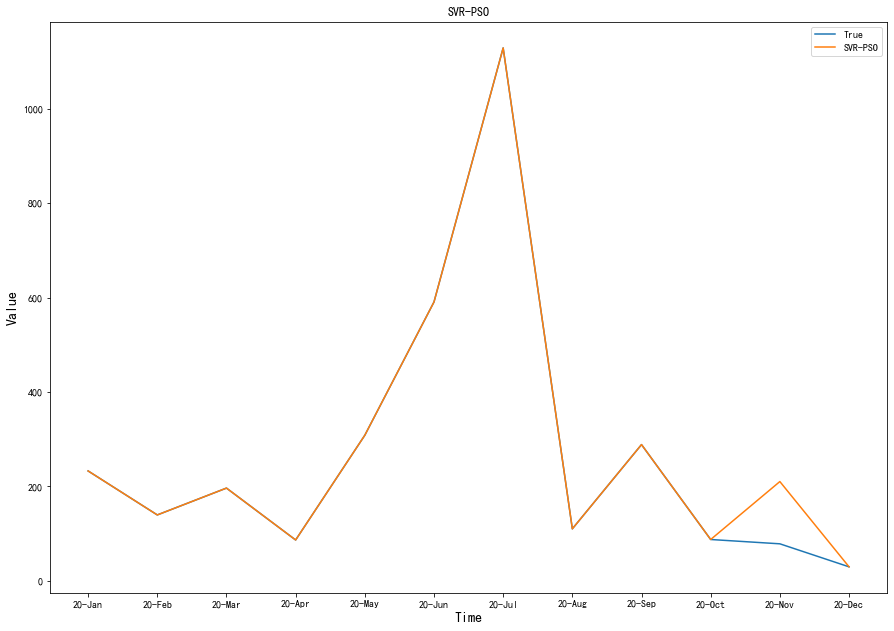

MSE: 1450.9426288846505
R2 =  0.9834832563331264
MAE =  10.996284110699653
Adjusted_R2 =  0.9833090290792564


In [12]:
model_svr = SVR(C=17651.376037111 ,epsilon=0.,gamma=5395.64587096)

model_svr.fit(feature_train,target_train)
print(feature_test)
predict_results=model_svr.predict(feature_test)

plt.plot(label_time,target_test)#测试数组
plt.plot(label_time,predict_results)#测试数组
plt.legend(['True','SVR-PSO'])
fig = plt.gcf()
fig.set_size_inches(15, 10.5)
plt.title("SVR-PSO")  # 标题
plt.xlabel('Time',fontsize=14,verticalalignment='top')
plt.ylabel('Value',fontsize=14,horizontalalignment='center')
plt.show()
print("MSE:",mean_squared_error(target_test,predict_results))
print("R2 = ",metrics.r2_score(target_test,predict_results)) # R2
print("MAE = ",mean_absolute_error(target_test,predict_results)) # R2
print("Adjusted_R2 = ",1-((1-metrics.r2_score(target_test,predict_results))*(480-1))/(480-5-1))